In [1]:
import numpy as np
import memory_profiler


In [2]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

In [3]:
def read_mprofile_file_multiprocess(filename):
    mem_usage = []
    sample = []
    
    f = open(filename,'r')
    
    for i,l in enumerate(f):
        if l == '\n':
            raise ValueError('Sampling time was too short')
        field, value = l.split(' ', 1)
        values = value.split(' ')
              
        if field=="MEM":
            # append the existing sample and reset to zero
            mem_usage.append(sample)
            sample = []
            sample.append((float(values[0]), float(values[1])))
        elif field=="CHLD": 
            sample.append((int(values[0]), float(values[1])))
          
    f.close()
    return mem_usage[1:]

def convert_to_array(filename, is_pickle=False): 
    import pandas as pd
    
    if is_pickle:
        from cPickle import load
        with open(filename) as f: 
            mem_usage = load(f)
    
    else:
        mem_usage = read_mprofile_file_multiprocess(filename)
        mem_usage = filter(lambda m: len(m) > 1, mem_usage)
    
    times =[m[0][1] for m in mem_usage]
    pids = np.sort(np.unique([m[0] for n in mem_usage for m in n[1:] if not isinstance(m,float)] + [0,]))
    
    time_lookup = {time: i for i,time in enumerate(times)}
    pid_lookup = {pid:i for i,pid in enumerate(pids)}
     
    data = np.zeros((len(times), len(pids)))
    
    for i,m in enumerate(mem_usage):
        t = m[0][1]
        
        # add the parent memory by hand
        data[time_lookup[t]][pid_lookup[0]] = m[0][0]
        
        try: 
            for pid,mem in m[1:]:
                data[time_lookup[t]][pid_lookup[pid]] = mem
        except TypeError:
            print 'found a bad value in ', i
            
    return pd.DataFrame(data, index=times, columns=pids)

def plot_mem_usage(filename, include_parent=True, is_pickle=False):
    data_df = convert_to_array(filename, is_pickle)
    
    f = plt.figure(figsize=(10,6))
    
    if not include_parent:
        data_df = data_df[data_df.columns[1:]]
        
    data_df.plot(legend=False, figsize=(14,10), grid=True, fontsize=14)
    data_df.sum(axis=1).plot(style='--', grid=True)
#     data_df.sum(axis=1).plot(style='--', grid=True)
    plt.xlabel('timestamp'); plt.ylabel('memory usage in MB')

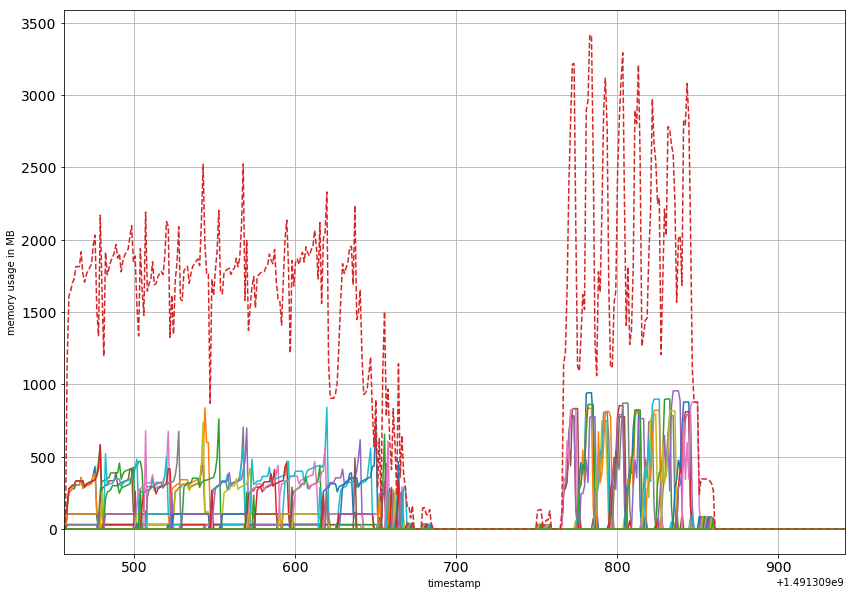

In [5]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse.dump', True)

found a bad value in  335


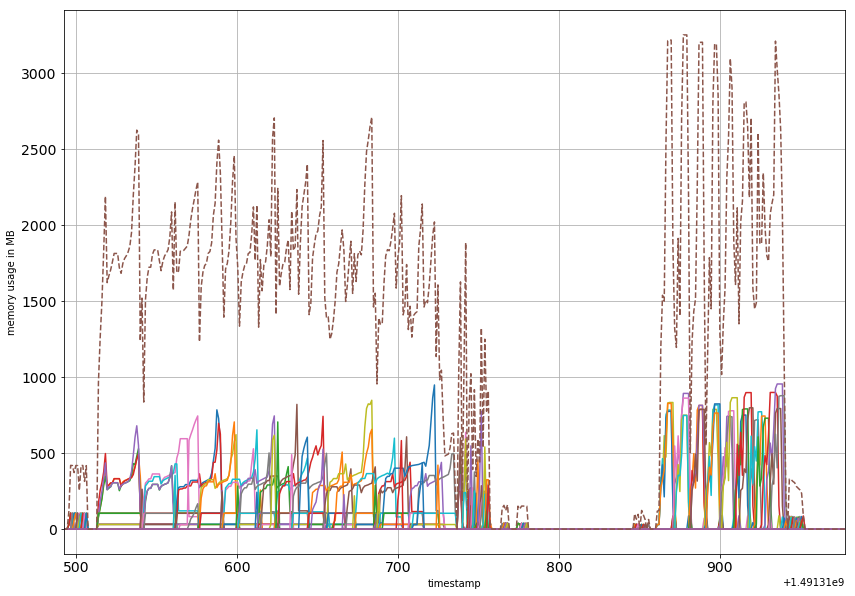

In [61]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse2.dump', True)

found a bad value in  39
found a bad value in  319


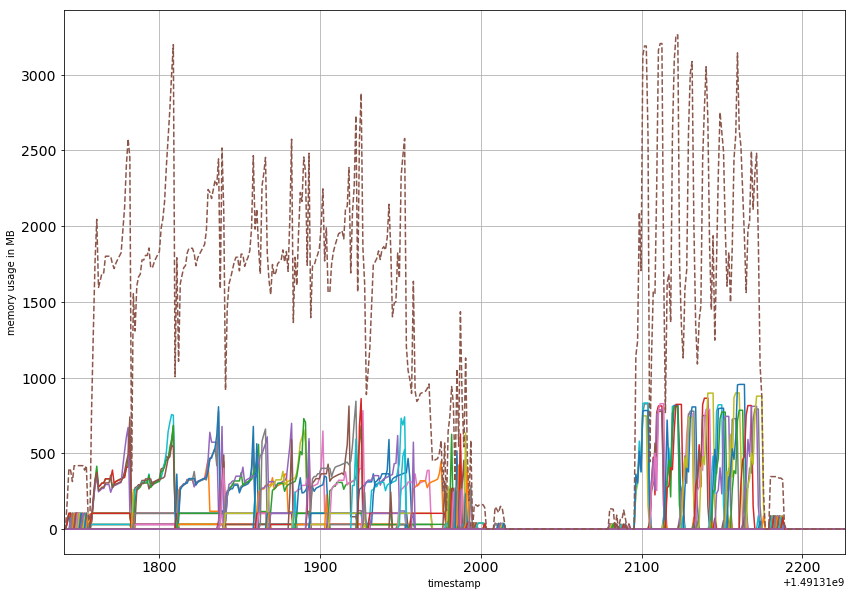

In [65]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse3.dump', True)

found a bad value in  135
found a bad value in  324


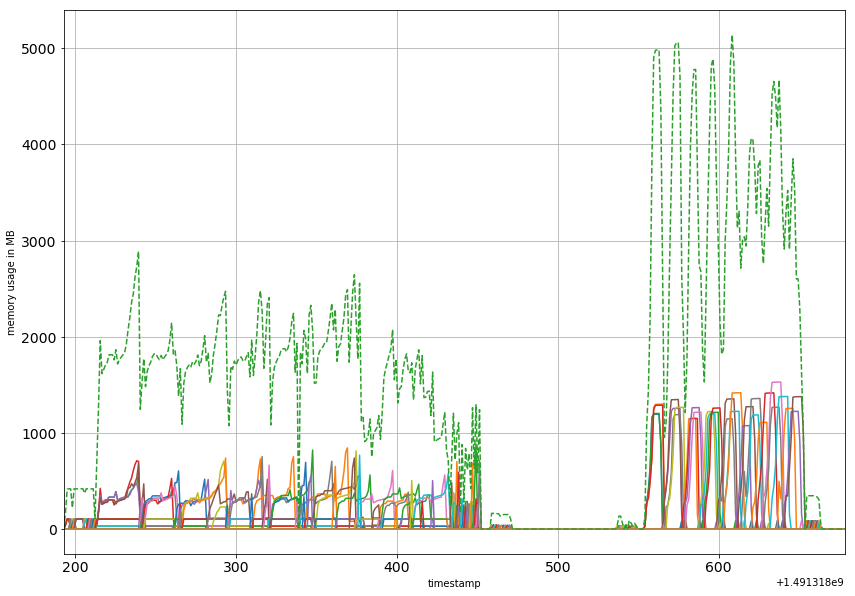

In [66]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse-list.dump', True)

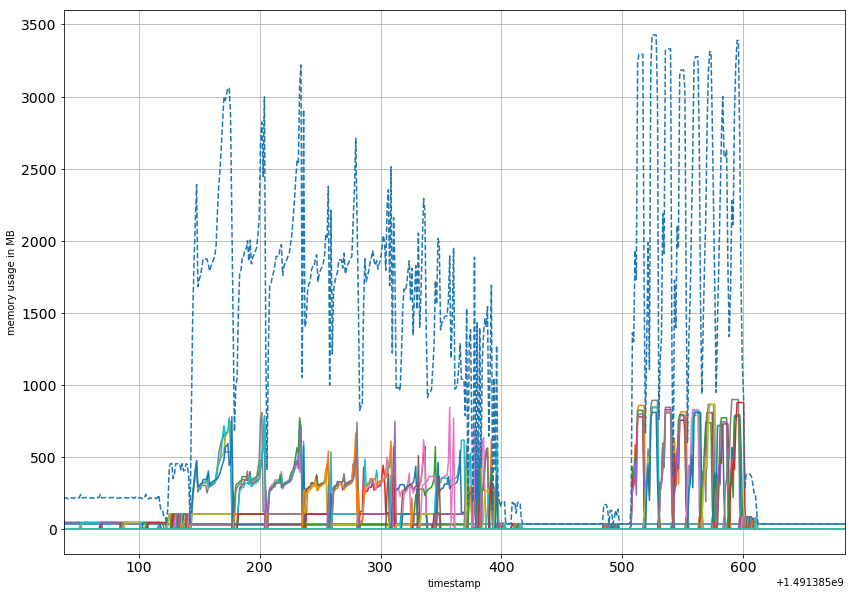

In [67]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse-no-part-array.dump', True)

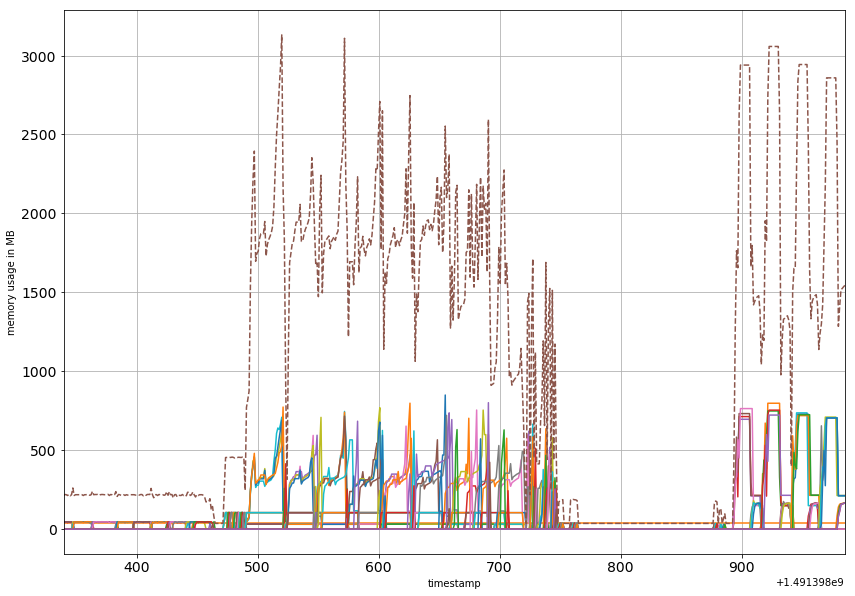

In [69]:
# using map instead of mapPartitions for fof_rdd
plot_mem_usage('/home/ics/roskar/mprofile_20170405151859.dat')

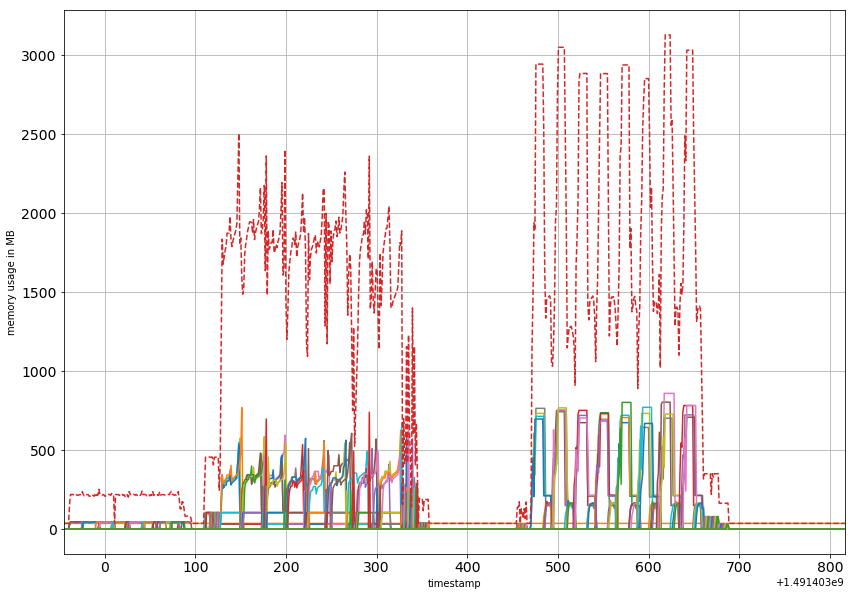

In [77]:
# same as above -- sanity check
plot_mem_usage('/home/ics/roskar/mprofile_20170405163554.dat')

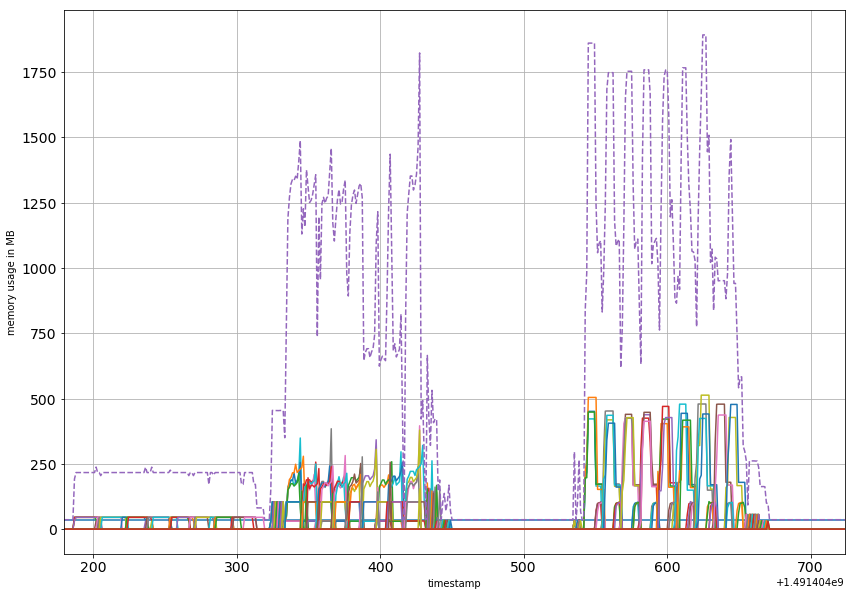

In [85]:
# 50% fewer particles
plot_mem_usage('/home/ics/roskar/mprofile_20170405165619.dat')

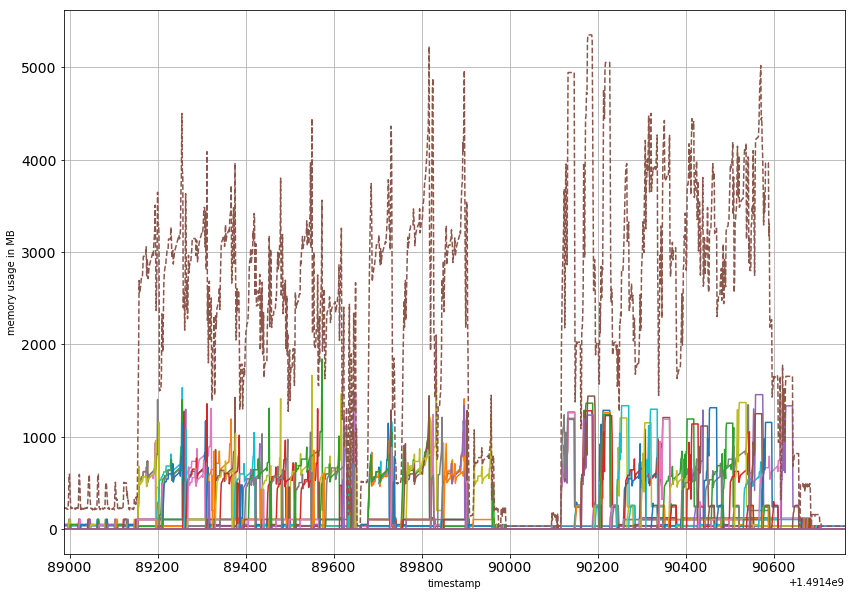

In [22]:
# 2x number of particles
plot_mem_usage('/home/ics/roskar/mprofile_20170406162946.dat')

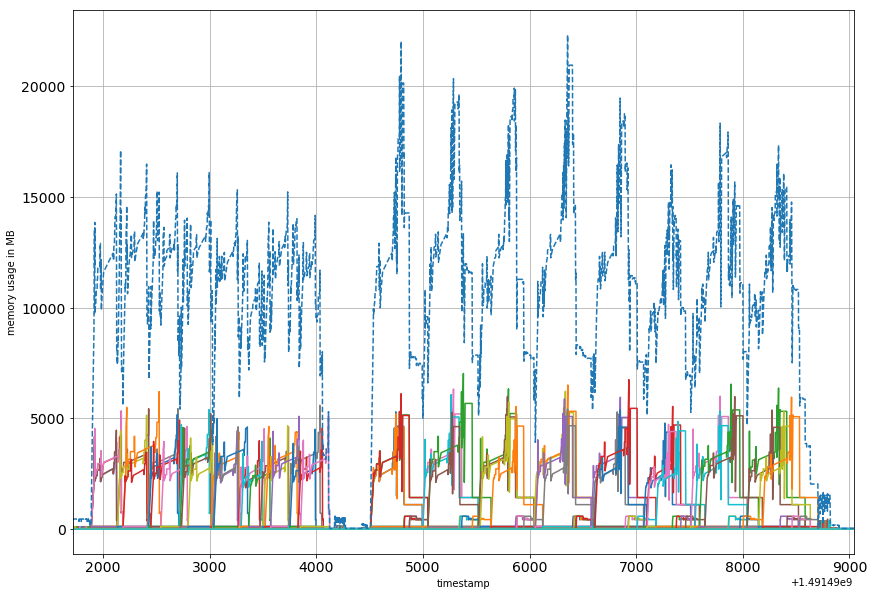

In [4]:
# all particles 8 cores, 64 blocks
plot_mem_usage('/home/ics/roskar/mprofile_20170406171514.dat')

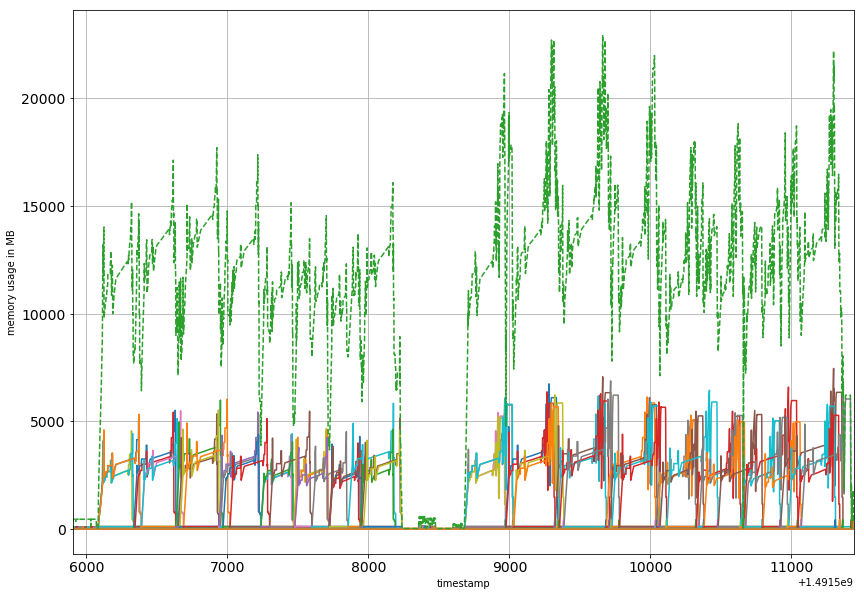

In [28]:
# all particles 8 cores, 64 blocks, old generator fof
plot_mem_usage('/home/ics/roskar/mprofile_20170406211136.dat')

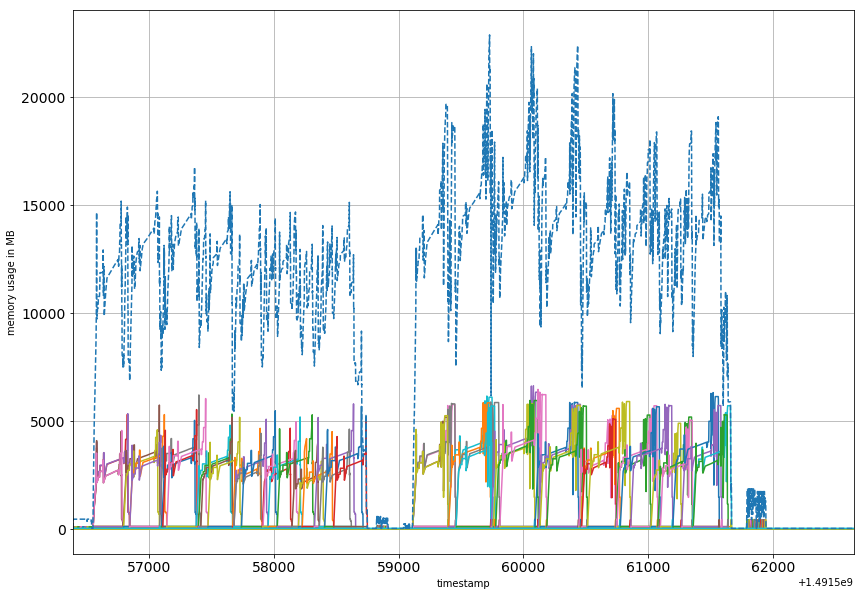

In [13]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407111304.dat')

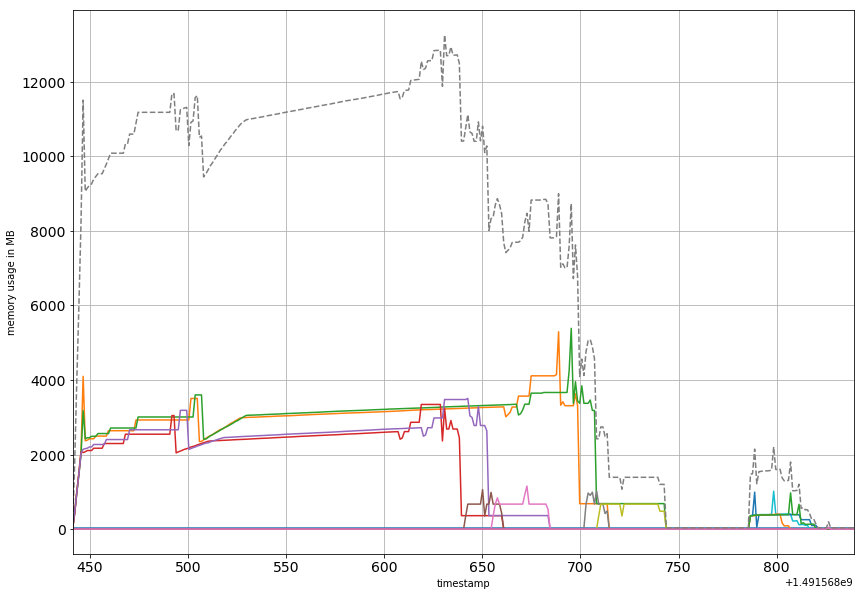

In [28]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407143401.dat')

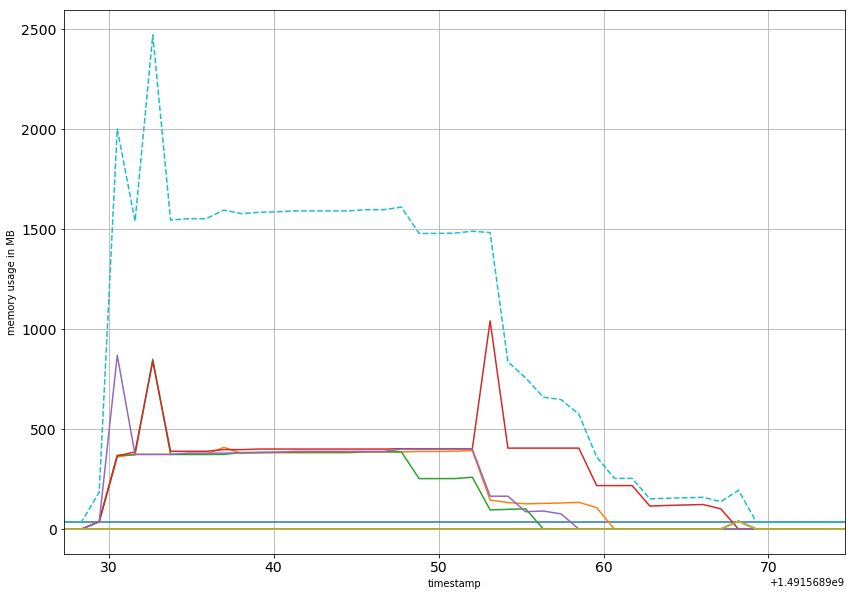

In [29]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407144207.dat')

In [44]:
# all particles 8 cores, 8 blocks -- fof on half the particles followed by a full groupby
# evidently, the groupbykey doesn't actually need a lot of memory - the long flat section
# I think is due to the conversion into a list, and then as the groupby happens it's dropped
plot_mem_usage('/home/ics/roskar/mprofile_20170407150617.dat')

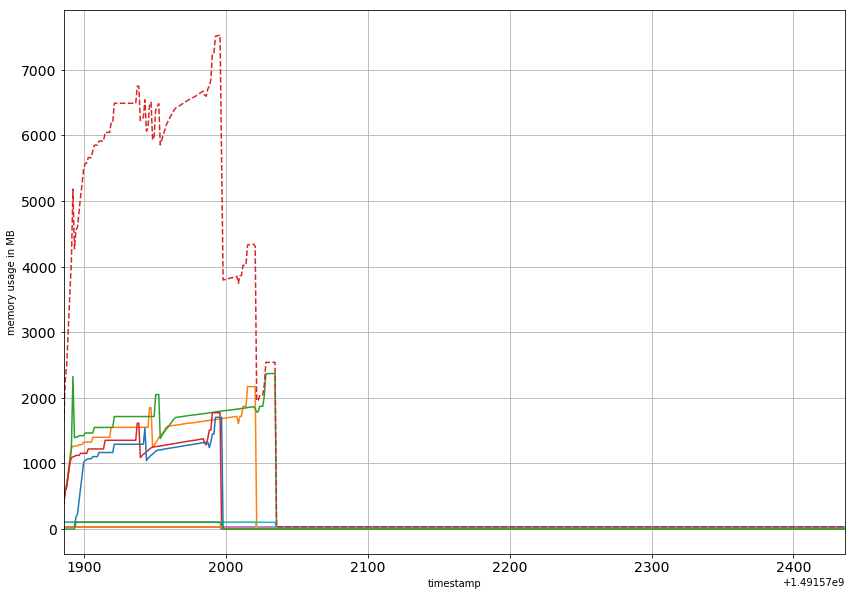

In [45]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407153125.dat')

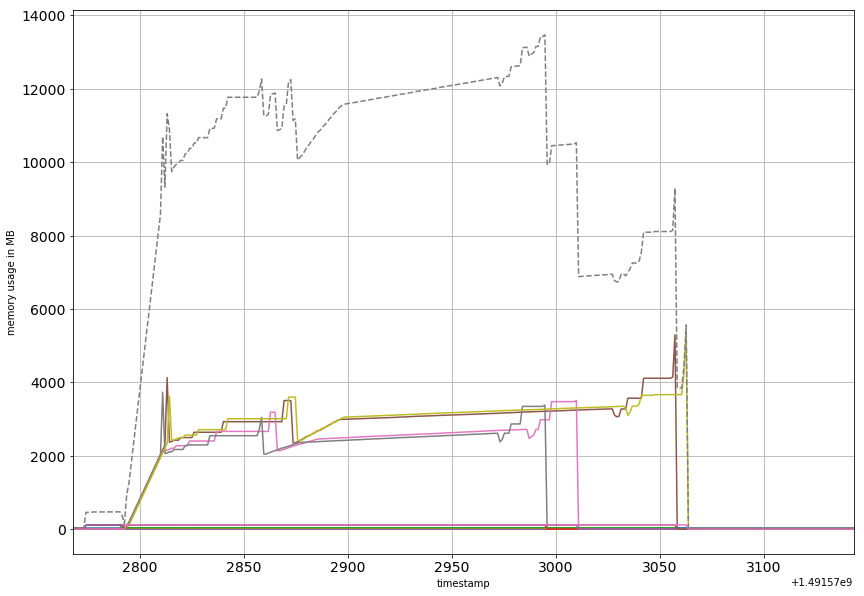

In [49]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407154607.dat')

In [65]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407163135.dat')

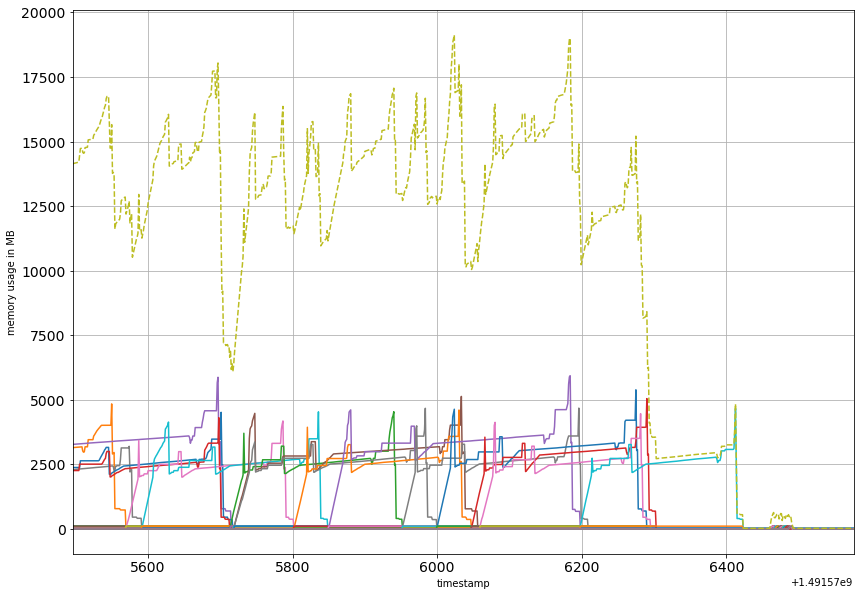

In [65]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170407163135.dat')

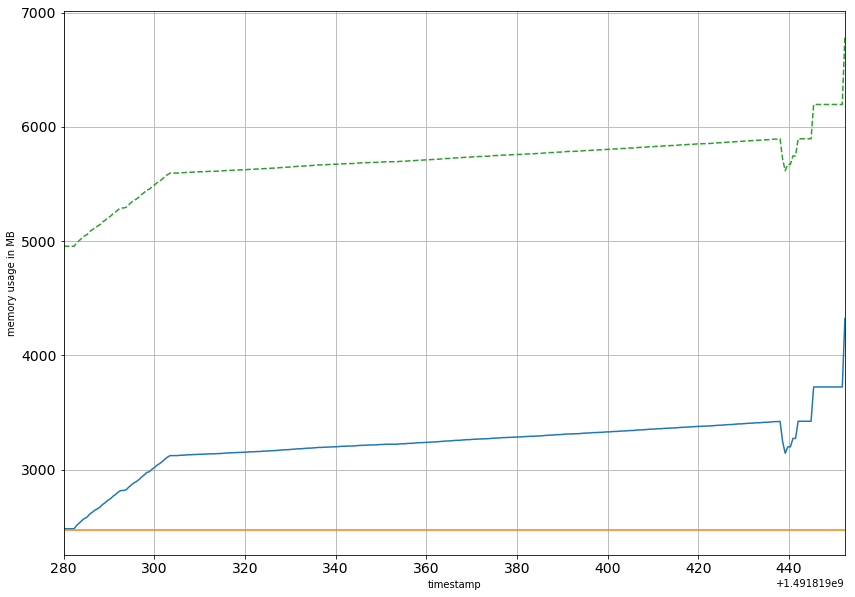

In [18]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170410121433.dat')

0        4323.394531
11282      68.726562
dtype: float64

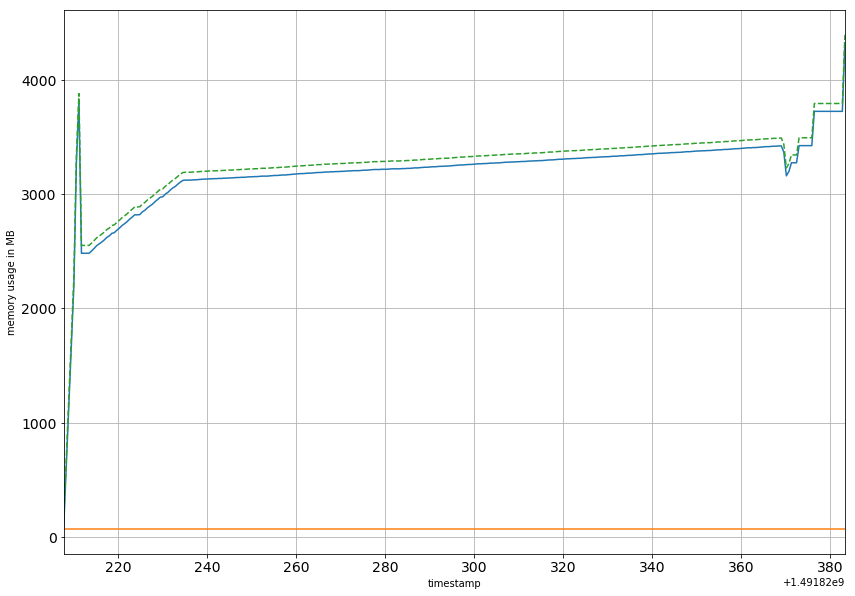

In [48]:
# all particles 8 cores, 64 blocks, commit 7b62bd91040
plot_mem_usage('/home/ics/roskar/mprofile_20170410122950.dat')
x = convert_to_array('/home/ics/roskar/mprofile_20170410122950.dat')
x.max()

In [50]:
# all particles 8 cores, 64 blocks, old generator fof
x = convert_to_array('/home/ics/roskar/mprofile_20170406211136.dat')


(1491510900.0, 1491511400.0)

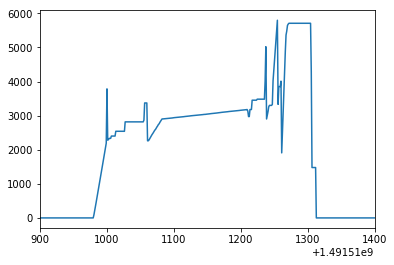

In [153]:
x[7904].plot()
plt.xlim(1.4915e9+10900, 1.4915e9+11400)

In [75]:
x[x.columns[1:]].as_matrix().max()

7462.328125

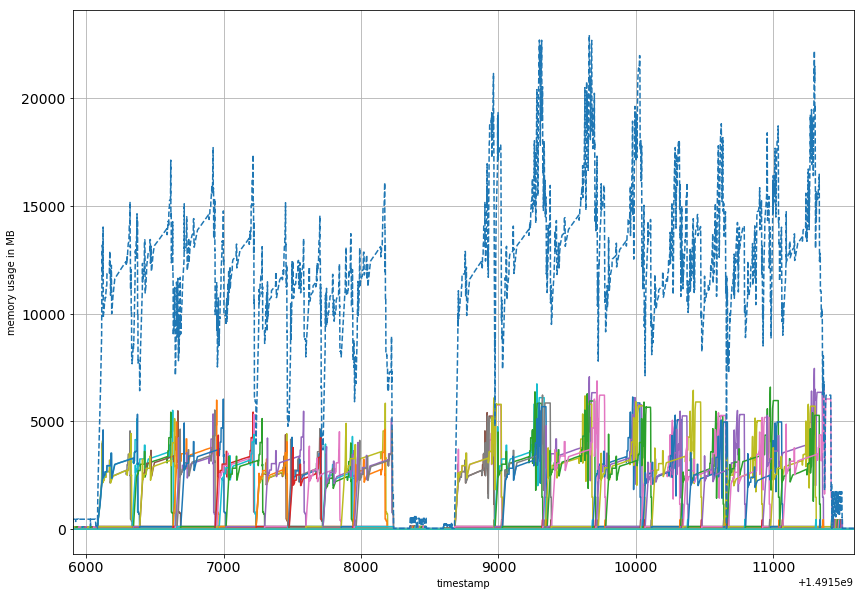

In [78]:
plot_mem_usage('/home/ics/roskar/mprofile_20170406211136.dat', include_parent=False)

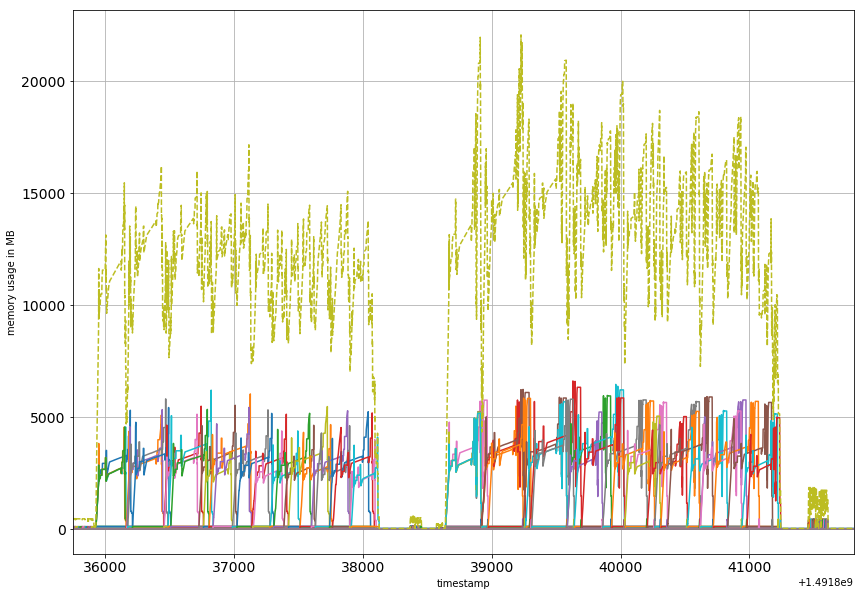

In [147]:
plot_mem_usage('/home/ics/roskar/mprofile_20170410164905.dat', include_parent=False)

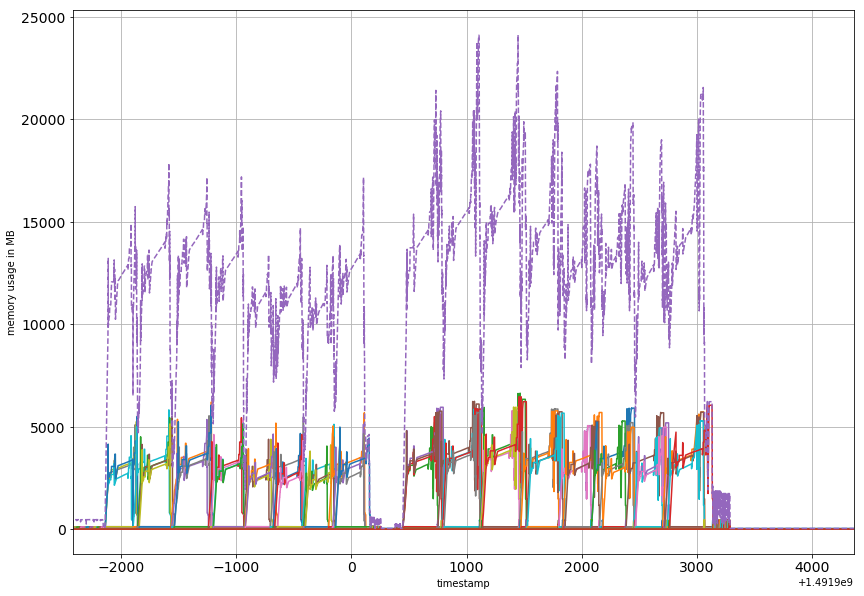

In [168]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170411095935.dat', include_parent=False)

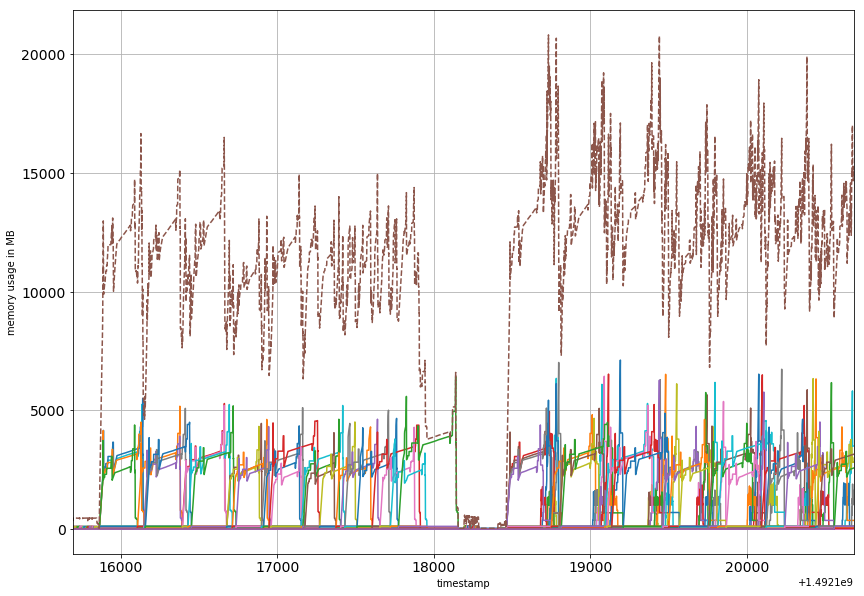

In [16]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170413223450.dat', include_parent=False)

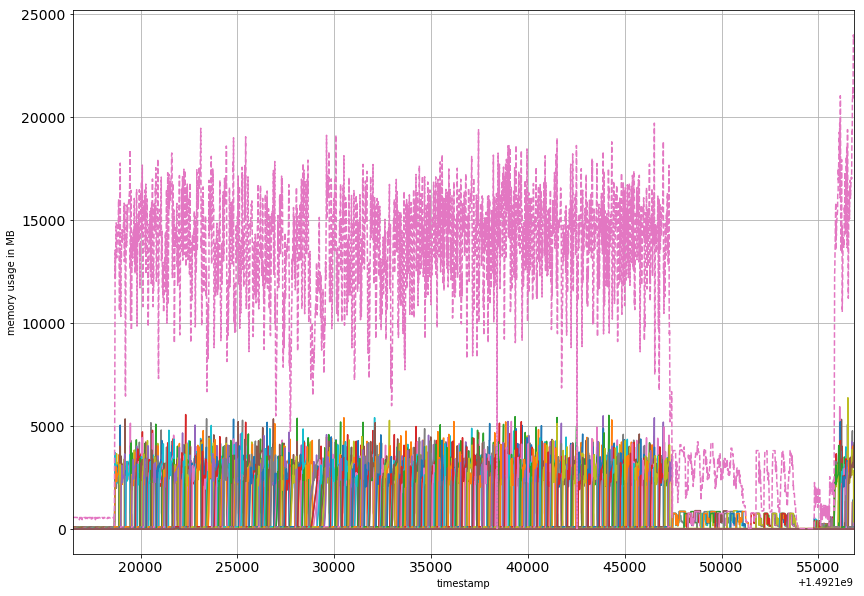

In [5]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170413224805.dat', include_parent=False)

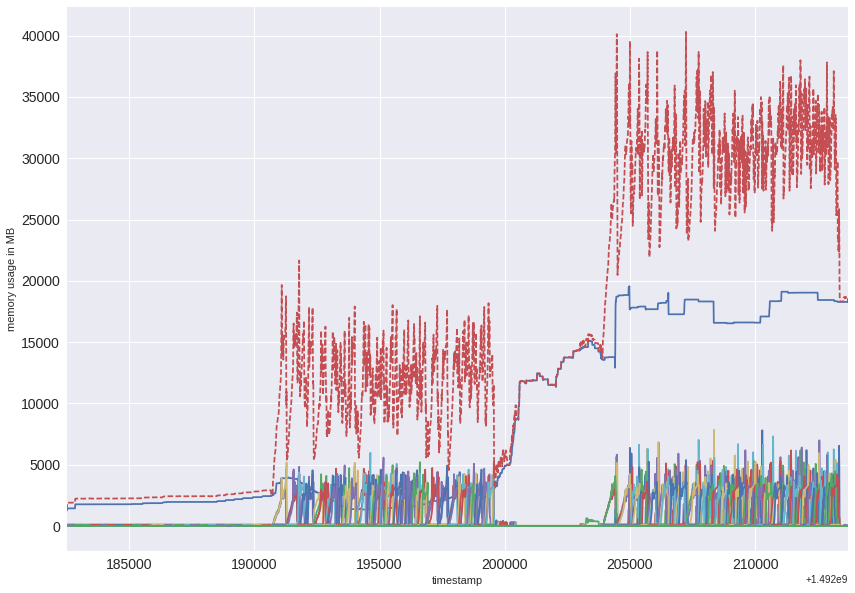

In [152]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170414170832.dat', include_parent=True)

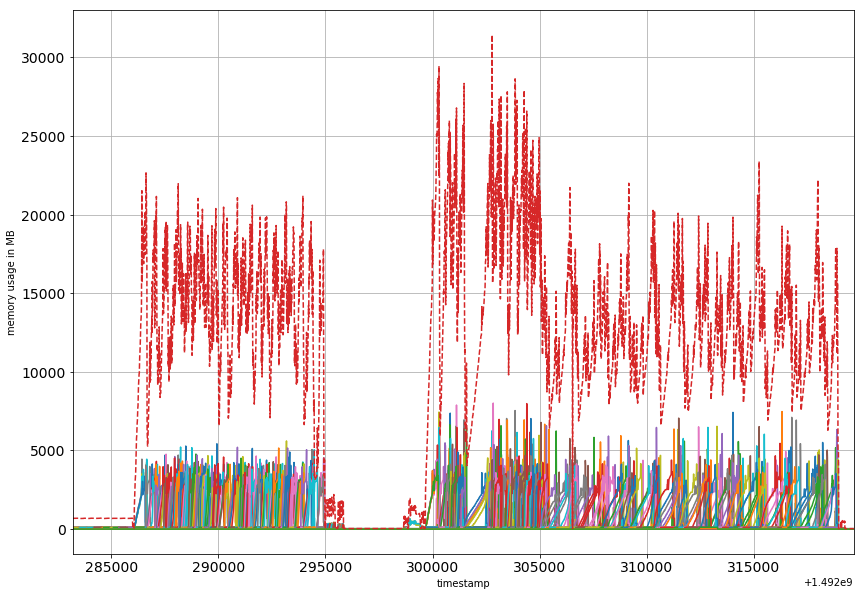

In [5]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170415210633.dat', include_parent=False)

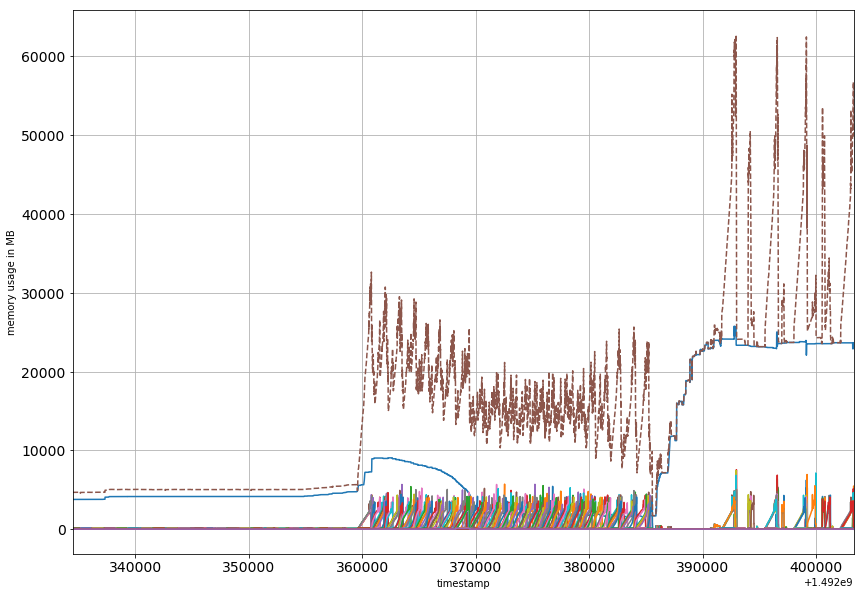

In [4]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170416112052.dat', include_parent=True)

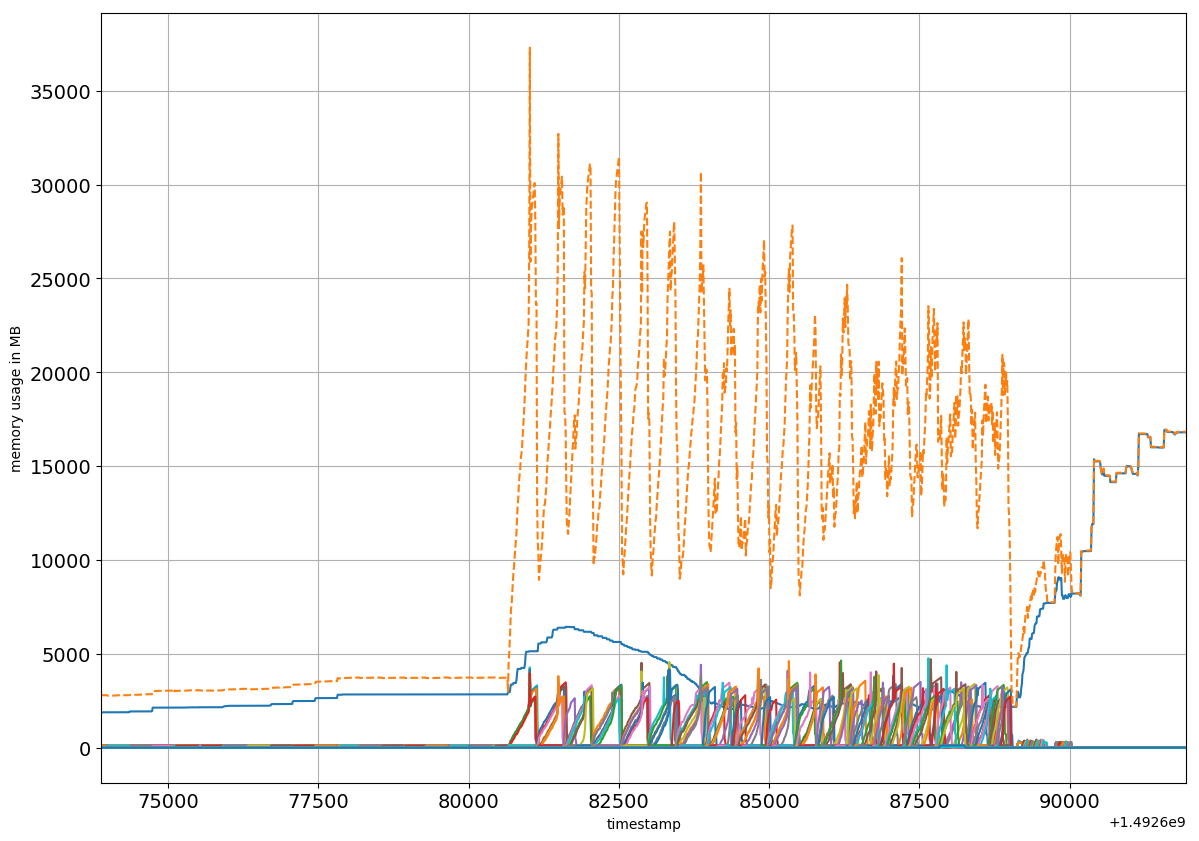

In [237]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170420093808.dat', include_parent=True)

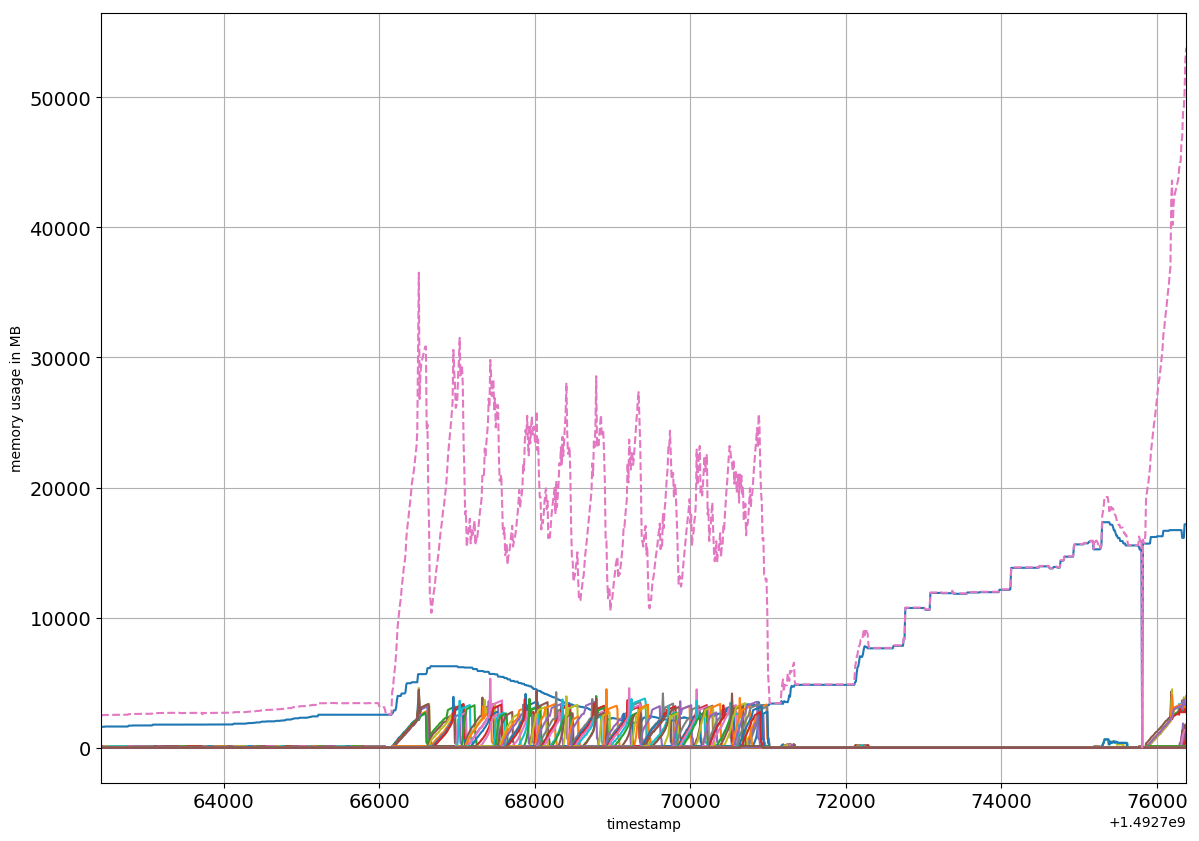

In [7]:
memory_profiler.plot_mem_usage('/home/ics/roskar/mprofile_20170421101347.dat', include_parent=True)

In [4]:
import spark_pyrest
import re
import pandas as pd
from collections import defaultdict

def get_log_stats(host, executor_id=None):
    io_regex = 'spark_fof: reading .+ took \d+ seconds in partition \d+, (\d+\.\d+)'
    timing_regex = 'spark_fof: (starting|finished) (fof|merged_rdd remap|group count) at (\d+\.\d+), pid=(\d+)'
 
    spr = spark_pyrest.SparkPyRest(host)
    
    if executor_id is None: 
        executor_id = range(len(spr.executors)-1)

    executor_stats = {}    
    io_stats = {}
    
    for eid in executor_id: 
        log = spr.executor_log(eid)

        pids = set([int(x) for x in re.findall('spark_fof:.+pid=(\d+)',log)])

        # get i/o stats
        io_rates = np.zeros(500)
        for i,x in enumerate(re.findall(io_regex, log)):
            io_rates[i] = float(x)
        
        # get fof stats
        fof_timing_stats = {pid: defaultdict(dict) for pid in pids}

        for state, kind, time, pid in re.findall(timing_regex, log):
            pid = int(pid)
            fof_timing_stats[pid][kind+'_'+state] = float(time)
        
        io_stats[eid] = io_rates
        executor_stats[eid] = pd.DataFrame(fof_timing_stats).transpose()
        
    return io_stats, executor_stats


In [65]:
host = '172.19.1.168'

In [66]:
io, df = get_log_stats(host)

io_df = pd.DataFrame(io).replace(0,np.nan)

In [67]:
io_df

0   1   2   3   4   5   6   7   8   9  ...  62  63  64  65  66  67  68  \
0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
1   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
2   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
3   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
4   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
5   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
6   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
7   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
8   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
9   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
10  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
11  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
12  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
13  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
14  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
15  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
16  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
17  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
18  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
19  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
20  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
21  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
22  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
23  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
24  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
25  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
26  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
27  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
28  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
29  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  .. ...  ..  ..  ..  ..  ..  ..  ..   
470 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
471 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
472 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
473 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
474 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
475 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
476 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
477 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
478 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
479 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
480 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
481 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
482 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
483 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
484 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
485 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
486 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
487 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN NaN NaN   
488 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN

In [47]:
io_df.sum(axis=1)

0      609.957778
1      511.680533
2      502.255052
3      511.321948
4      205.004851
5      195.872829
6      185.140255
7      182.187320
8      653.691913
9      651.187850
10     647.556089
11     651.060442
12     647.994964
13     645.332130
14     614.109772
15     604.318643
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
          ...    
470           NaN
471           NaN
472           NaN
473           NaN
474           NaN
475           NaN
476           NaN
477           NaN
478           NaN
479           NaN
480           NaN
481           NaN
482           NaN
483           NaN
484           NaN
485           NaN
486           NaN
487           NaN
488           NaN
489           NaN
490           NaN
491           NaN
492           NaN
493           NaN
494       

In [9]:
spr = spark_pyrest.SparkPyRest(host)

In [10]:
spr.app

u'app-20170426104832-0000'

In [21]:
exec_tasks = spr.tasks(1)[['host','bytesWritten','remoteBytesRead','executorRunTime']].groupby('host')

In [22]:
exec_tasks.describe()

bytesWritten  executorRunTime  remoteBytesRead
host                                                              
172.19.1.100 count  1.600000e+01     1.600000e+01        16.000000
             mean   1.338130e+06     1.137744e+06       110.875000
             std    1.448655e+06     1.175471e+06         0.341565
             min    0.000000e+00     0.000000e+00       110.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    9.432830e+05     1.101435e+06       111.000000
             75%    2.531166e+06     2.281212e+06       111.000000
             max    3.549511e+06     2.356697e+06       111.000000
172.19.1.101 count  1.600000e+01     1.600000e+01        16.000000
             mean   1.484798e+06     1.136394e+06       110.937500
             std    1.601124e+06     1.173672e+06         0.250000
             min    0.000000e+00     0.000000e+00       110.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    9.959325e+05     1.131456e+06       111.000000
             75%    2.954683e+06     2.274374e+06       111.000000
             max    3.713502e+06     2.278922e+06       111.000000
172.19.1.102 count  1.600000e+01     1.600000e+01        16.000000
             mean   1.474132e+06     1.130606e+06       110.812500
             std    1.609935e+06     1.167883e+06         0.543906
             min    0.000000e+00     0.000000e+00       109.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    1.028862e+06     1.101560e+06       111.000000
             75%    2.654341e+06     2.277719e+06       111.000000
             max    4.124446e+06     2.284531e+06       111.000000
172.19.1.103 count  1.600000e+01     1.600000e+01        16.000000
             mean   1.399061e+06     1.088868e+06       110.875000
             std    1.531704e+06     1.124674e+06         0.341565
             min    0.000000e+00     0.000000e+00       110.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    9.577340e+05     1.068554e+06       111.000000
...                          ...              ...              ...
172.19.1.96  std    1.489407e+06     1.136214e+06         0.250000
             min    0.000000e+00     0.000000e+00       110.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    1.053304e+06     1.045389e+06       111.000000
             75%    2.596475e+06     2.182210e+06       111.000000
             max    3.570545e+06     2.356058e+06       111.000000
172.19.1.97  count  1.600000e+01     1.600000e+01        16.000000
             mean   1.469833e+06     1.126575e+06       103.937500
             std    1.583647e+06     1.163827e+06        27.718751
             min    0.000000e+00     0.000000e+00         0.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    1.018470e+06     1.092272e+06       111.000000
             75%    2.749785e+06     2.271872e+06       111.000000
             max    3.724653e+06     2.279397e+06       111.000000
172.19.1.98  count  1.600000e+01     1.600000e+01        16.000000
             mean   1.304545e+06     1.171278e+06       110.812500
             std    1.495882e+06     1.210079e+06         0.543906
             min    0.000000e+00     0.000000e+00       109.000000
             25%    0.000000e+00     0.000000e+00       111.000000
             50%    5.712020e+05     1.139731e+06       111.000000
             75%    2.395591e+06     2.353411e+06       111.000000
             max    4.069355e+06     2.404579e+06       111.000000
172.19.1.99  count  1.600000e+01     1.600000e+01        16.000000
             mean   1.426988e+06     1.124786e+06       110.875000
             std    1.567230e+06     1.161718e+06         0.341565
             min    0.000000e+00     0.000000e+00       110.000000
             25%    0.000000e+00     0.000000e+00       111.000000


In [23]:
mean_runtime = exec_tasks.mean()['executorRunTime']

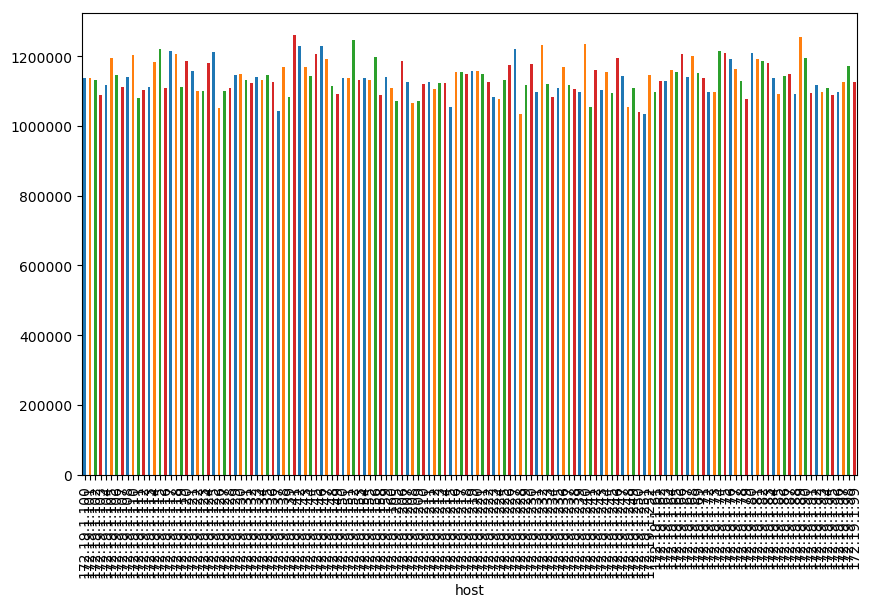

In [26]:
mean_runtime.plot(kind='bar', figsize=(10,6), color=['C0', 'C1', 'C2', 'C3']);